<a href="https://colab.research.google.com/github/Mohdsyeed/DataScienceProject/blob/main/Emotion_NLP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
a = files.upload()

Saving test.txt to test (1).txt
Saving train.txt to train (1).txt
Saving val.txt to val (1).txt


The code ***from google.colab import files*** is used to import the files module and this module provides functions from uploading files from local computer to **Colab environmrnt**.

In [6]:
import pandas as pd
import numpy as np

In [7]:
df_train = pd.read_csv('train.txt', header =None, sep =';', names = ['Input','Sentiment'], encoding='utf-8')
df_train.head()

,Input,Sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
df_test = pd.read_csv('test.txt', header = None, sep =';', names = ['Input','Sentiment'],encoding='utf-8')
df_test.head()

,Input,Sentiment
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [ ]:
np.unique(df_train['Sentiment'])

array(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'],
      dtype=object)

In [ ]:
df_train['Sentiment'].replace("anger",0,inplace = True)
df_train['Sentiment'].replace("fear",1,inplace = True)
df_train['Sentiment'].replace("joy",2,inplace = True)
df_train['Sentiment'].replace("love",3,inplace = True)
df_train['Sentiment'].replace("sadness",4,inplace = True)
df_train['Sentiment'].replace("surprise",5,inplace = True)

In [ ]:
df_train.head(10)

,Input,Sentiment
0,i didnt feel humiliated,4
1,i can go from feeling so hopeless to so damned...,4
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,3
4,i am feeling grouchy,0
5,ive been feeling a little burdened lately wasn...,4
6,ive been taking or milligrams or times recomme...,5
7,i feel as confused about life as a teenager or...,1
8,i have been with petronas for years i feel tha...,2
9,i feel romantic too,3


<Axes: xlabel='Sentiment', ylabel='count'>

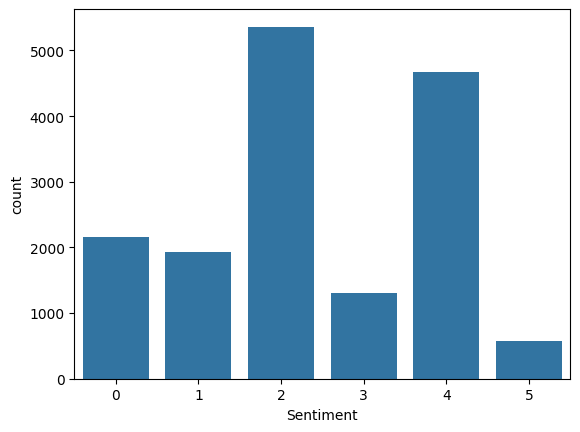

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="Sentiment",data=df_train)

<Axes: xlabel='Sentiment'>

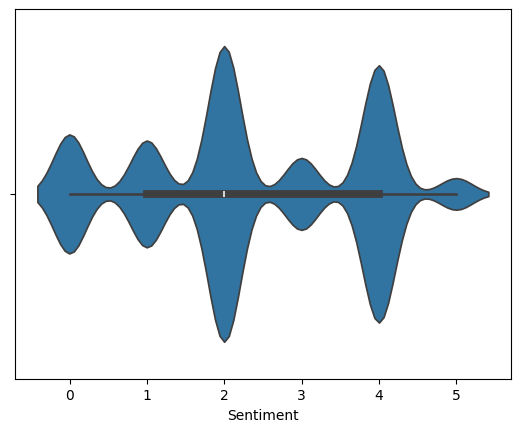

In [ ]:
sns.violinplot(x='Sentiment',data=df_train)

In [ ]:
df_train.isnull().sum()

Input        0
Sentiment    0
dtype: int64

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Input      16000 non-null  object
 1   Sentiment  16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [ ]:
df_train.describe()

,Sentiment
count,16000.000000
mean,2.381063
std,1.444121
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,5.000000


Splitting Input & Output

In [ ]:
x = df_train["Input"]
y = df_train["Sentiment"]

In [ ]:
x.head()

0                              i didnt feel humiliated
1    i can go from feeling so hopeless to so damned...
2     im grabbing a minute to post i feel greedy wrong
3    i am ever feeling nostalgic about the fireplac...
4                                 i am feeling grouchy
Name: Input, dtype: object

In [ ]:
y.head()

0    4
1    4
2    0
3    3
4    0
Name: Sentiment, dtype: int64

In [ ]:
print(x.shape,y.shape)

(16000,) (16000,)


In [ ]:
message = x.copy()
voc_size = 10000

In [ ]:
message[0]

'i didnt feel humiliated'

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(message)):
    review = re.sub('[^a-zA-Z]', ' ', message[i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus[0]

'didnt feel humili'

Sometimes we need to install libraries

In [ ]:
!pip install keras-preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 768.0 kB/s eta 0:00:00


In [ ]:
from tensorflow import keras
from keras_preprocessing.text import one_hot

In [ ]:
one_hot_representation = [one_hot(words,voc_size) for words in corpus]

In [ ]:
one_hot_representation[0]

[1476, 2380, 1209]

In [ ]:
from keras.preprocessing.sequence import pad_sequences

In [ ]:
sent_length = 20
embedded_doc = pad_sequences(one_hot_representation,padding='pre',maxlen=sent_length)
embedded_doc[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0, 1476, 2380, 1209], dtype=int32)

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding,Dense,Dropout,LSTM,Bidirectional

In [ ]:
dimension = 40
model = Sequential()
model.add(Embedding(voc_size,dimension,input_length=sent_length))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1,activation='relu'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            400000    
                                                                 
 bidirectional (Bidirection  (None, 200)               112800    
 al)                                                             
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 513001 (1.96 MB)
Trainable params: 513001 (1.96 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
!pip install graphviz

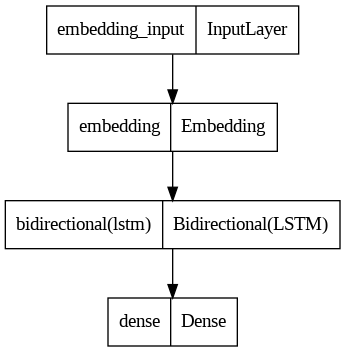

In [ ]:
# (No longer works) from keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
final_input = np.array(embedded_doc)
final_output = y

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(final_input, final_output, test_size=0.33, random_state=42)

In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=12,batch_size=32)

Epoch 1/12


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(32, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


335/335 [==============================] - 30s 59ms/step - loss: nan - accuracy: 0.1394 - val_loss: nan - val_accuracy: 0.1259
Epoch 2/12
335/335 [==============================] - 14s 42ms/step - loss: nan - accuracy: 0.1394 - val_loss: nan - val_accuracy: 0.1259
Epoch 3/12
335/335 [==============================] - 14s 41ms/step - loss: nan - accuracy: 0.1394 - val_loss: nan - val_accuracy: 0.1259
Epoch 4/12
335/335 [==============================] - 14s 41ms/step - loss: nan - accuracy: 0.1394 - val_loss: nan - val_accuracy: 0.1259
Epoch 5/12
335/335 [==============================] - 14s 43ms/step - loss: nan - accuracy: 0.1394 - val_loss: nan - val_accuracy: 0.1259
Epoch 6/12
335/335 [==============================] - 13s 39ms/step - loss: nan - accuracy: 0.1394 - val_loss: nan - val_accuracy: 0.1259
Epoch 7/12
335/335 [==============================] - 13s 40ms/step - loss: nan - accuracy: 0.1394 - val_loss: nan - val_accuracy: 0.1259
Epoch 8/12
335/335 [=========================

In [ ]:
def suicide_avoider(x):
  ps=PorterStemmer()
  corpus=[]
  review=re.sub('[^a-zA-Z]',' ',x)
  review=review.lower()
  review=review.split()

In [ ]:
review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
review=' '.join(review)
corpus.append(review)

In [ ]:
voc_size = 5000
one_hot_r = [one_hot(word,voc_size) for word in corpus]

In [ ]:
max_length = 20
embedded_docs = pad_sequences(one_hot_r,max_length,padding='pre')

In [ ]:
dimension = 40
model = Sequential()
model.add(Embedding(voc_size,dimension,input_length=max_length))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1,activation='softmax'))
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam' , metrics = ['accuracy'])
prediction = model.predict(np.array(embedded_docs))
if prediction.all() ==0:
  print("person is angry")
elif prediction.all() ==1:
  print("person is in fear")
elif prediction.all() ==2:
  print("person is in joy")
elif prediction.all() ==3:
  print("person is in love")
elif prediction.all() ==4:
  print("person is sad")
else:
  print("person is surprise")
x = str(input())
print(suicide_avoider(x))

501/501 [==============================] - 5s 9ms/step
person is in fear
hi dear
None


In [ ]:
model.save("suicide.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model("suicide.h5")


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Example input sentence
input_sentence = "I feel happy today"

# Tokenize and preprocess the input sentence
tokenizer = Tokenizer()
tokenizer.fit_on_texts([input_sentence])
input_sequence = tokenizer.texts_to_sequences([input_sentence])
max_length = 20  # Adjusted to match the expected input length of your model
input_sequence = pad_sequences(input_sequence, maxlen=max_length)

# Print the tokenized sequence
print("Tokenized sequence:", input_sequence)

# Predict the sentiment probabilities
sentiment_probs = loaded_model.predict(input_sequence)

# Determine the sentiment class with the highest probability
predicted_sentiment_class = sentiment_probs.argmax()

# Mapping predicted sentiment class to sentiment label
sentiment_labels = ["angry", "fear", "joy", "love", "sad", "surprise"]
predicted_sentiment_label = sentiment_labels[predicted_sentiment_class]

print(f"The sentence '{input_sentence}' belongs to the sentiment: {predicted_sentiment_label}")


Tokenized sequence: [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 3 4]]
1/1 [==============================] - 0s 25ms/step
The sentence 'I feel happy today' belongs to the sentiment: angry
